In [2]:
import pandas as pd
from collections import Counter
import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline


train = pd.read_csv('fashion-mnist_train.csv')
print(train.shape)

train.head()

x = train.drop('label', axis=1).as_matrix()
t = train['label'].as_matrix()

x_train0, x_test0, t_train, t_test = train_test_split(x, t, train_size=0.8, test_size=0.2, random_state=1)

print(x_train0.shape)
print(x_test0.shape)

(60000, 785)


/Users/okihayas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/okihayas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(48000, 784)
(12000, 784)


In [5]:
x_train = x_train0.reshape(48000, 1, 28, 28)
x_test = x_test0.reshape(12000, 1, 28, 28)

print(x_train.shape)
print(x_test.shape)

(48000, 1, 28, 28)
(12000, 1, 28, 28)


In [6]:
label = train['label']
Counter(label)

Counter({2: 6000,
         9: 6000,
         6: 6000,
         0: 6000,
         3: 6000,
         4: 6000,
         5: 6000,
         8: 6000,
         7: 6000,
         1: 6000})

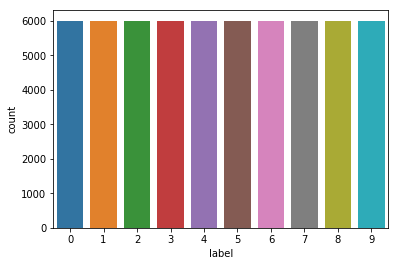

In [7]:
sns.countplot(label)

In [ ]:
import sys, os
#sys.path.appened(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

x_train, t_train = x_train[:5000], t_train[:5000]

max_epochs = 10

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000, verbose=False)

trainer.train()

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
print(trainer.train_acc_list)
print(trainer.test_acc_list)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()